# Import Statements

In [231]:
import os
import numpy as np
import torch
import torch.utils.data as tchdata
from sklearn import preprocessing
from sklearn import datasets, metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import svm
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter, ListedColormap # some plotting functions
from matplotlib.offsetbox import TextArea, VPacker, AnnotationBbox

## F1 : Plots

In [232]:
def plots(first, y_label, title, num_iterations , x_label='iterations',second=None, third=None, show_min=True):
    
    fig = plt.figure()
    fig.gca().set_position((.15, .3, .80, .6))
    
    plt.ylabel(y_label+"->")
    
#     (activation, layers_dims, num_iterations, learning_rate, lambd) = info
#     s1="lambda="+str(lambd)
#     s2="layers_dimensions="+str(layers_dims)
#     s3="num_iterations="+str(num_iterations)
#     s4="learning_rate="+str(learning_rate)
#     s5="activation="+str(activation)
    
    t =np.linspace(0, num_iterations-1, num=num_iterations)
    plt.figtext(.5,.92,title, fontsize=14, ha='center', fontweight='bold')        
#     plt.figtext(0.5,.136,s1+"\n"+s4+"\n"+s3+"\n"+s2,fontsize=10,ha='left', va='center',  bbox={'facecolor':'grey', 'alpha':0.3, 'pad':4})
    plt.figtext(0.25, .33, x_label+'->', fontsize=10,ha='left', va='center')  
#     plt.figtext(0.45,.85,s5,fontsize=10,ha='left', va='center',color='#B22222', bbox={'facecolor':'wheat', 'alpha':0.3, 'pad':5})     
    
    
    first_list, first_list_name=first
    first_array = np.array(first_list)
    (first_max_x, first_max_y)=(round((np.argmax(first_array)),3), round(np.amax(first_array), 3))

    #(global_max_x, global_max_y, global_max_name)=(t[first_max_x], first_max_y, first_list_name)
    if (second is not None):
        second_list, second_list_name=second
        second_array = np.array(second_list)
        (second_max_x, second_max_y)=(round((np.argmax(second_array)),3), round(np.amax(second_array), 3))
        #(global_max_x, global_max_y, global_max_name)=(global_max_x, global_max_y, global_max_name) if (global_max_y<second_max_y) else  (t[second_max_x], second_max_y,second_list_name)

    
    if not(third is None):
        third_list, third_list_name=third
        third_array=np.array(third_list)
        (third_max_x, third_max_y)=(round((np.argmax(third_array)),3), round(np.amax(third_array), 3))
        #(global_max_x, global_max_y, global_max_name)=(t[third_max_x], third_max_y, third_list_name) if (third_max_y<global_max_y) else  (global_max_x, global_max_y, global_max_name)
    

    if(show_min):
        plt.scatter(first_max_x,first_max_y,c='b',label='max_'+first_list_name+'('+str(first_max_x)+','+str(first_max_y)+')')
        if ((third is None) and (not(second is None))):
            plt.scatter(second_max_x,second_max_y,c='r',label='max_'+second_list_name+'('+str(second_max_x)+','+str(second_max_y)+')')

        elif (not(third is None) and not(second is None)):

            plt.scatter(second_max_x,second_max_y,c='r',label='max_'+second_list_name+'('+str(second_max_x)+','+str(second_max_y)+')')
            plt.scatter(third_max_x,third_max_y,c='g',label='max_'+third_list_name+'('+str(third_max_x)+','+str(third_max_y)+')')

        #print('For '+str(num_iterations)+' iterations, maximum value ['+str(global_max_y) + '] of the graph for "'+str(title)+'" was obtained at '+ str(global_max_x)+'th iteration, corresponding to "'+str(global_max_name)+'" plot.')

    plot1,=plt.plot(t, np.squeeze(first_list), 'b-', linewidth=1.5, label=first_list_name)
    plt.legend(bbox_to_anchor=(0.4, -0.15))
    if (not(second is None)):
            plot2,=plt.plot(t, np.squeeze(second_list), 'r-', linewidth=1.5, label=second_list_name)
            plt.legend(bbox_to_anchor=(0.4, 0))
            if(not(third is None)):
                plot3,=plt.plot(t, np.squeeze(third_list), 'g-', linewidth=1.5, label=third_list_name)
                plt.legend(bbox_to_anchor=(0.4, 0.15))
    
    
    plt.savefig('plots/['+str(datetime.now()).replace(":", "")+'] '+title+".png")
    plt.show()
    return (0,0,0)

## F2/F3/F4 : Confusion Matrix 1/2/3

In [414]:
def confusion_table1(test_labels, pred, title):
    conf_matrix = metrics.confusion_matrix(test_labels, pred, labels=None)  # Get confustion matrix
    # Plot the confusion table
    x=[1, 2, 6, 7, 8]
    class_names = ['${:d}$'.format(i) for i in x]  # Digit class names
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # Show class labels on each axis
    ax.xaxis.tick_top()
    major_ticks = range(0,5)
    minor_ticks = [x + 0.5 for x in range(0, 5)]
    ax.xaxis.set_ticks(major_ticks, minor=False)
    ax.yaxis.set_ticks(major_ticks, minor=False)
    ax.xaxis.set_ticks(minor_ticks, minor=True)
    ax.yaxis.set_ticks(minor_ticks, minor=True)
    ax.xaxis.set_ticklabels(class_names, minor=False, fontsize=15)
    ax.yaxis.set_ticklabels(class_names, minor=False, fontsize=15)
    # Set plot labels
    ax.yaxis.set_label_position("right")
    ax.set_xlabel('Predicted label', fontsize=12)
    ax.set_ylabel('True label', fontsize=12)
    fig.suptitle(title, y=1.04, fontsize=14, ha='center', fontweight='bold')
    # Show a grid to seperate digits
    ax.grid(b=True, which=u'minor')
    # Color each grid cell according to the number classes predicted
    ax.imshow(conf_matrix, interpolation='nearest', cmap='binary')
    # Show the number of samples in each cell
    for x in range(conf_matrix.shape[0]):
        for y in range(conf_matrix.shape[1]):
            color = 'w' if x == y else 'k'
            ax.text(x, y, conf_matrix[y,x], ha="center", va="bottom", color=color)       
    plt.savefig('plots/['+str(datetime.now()).replace(":", "")+'] Confusion table.png', bbox_inches='tight')
    plt.show()

In [415]:
def confusion_table2(test_labels, pred, title):
    conf_matrix = metrics.confusion_matrix(test_labels, pred, labels=None)  # Get confustion matrix
    # Plot the confusion table
    x = [3, 4, 5, 9, 10, 11, 12]
    class_names = ['${:d}$'.format(i) for i in x]  # Digit class names
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # Show class labels on each axis
    ax.xaxis.tick_top()
    major_ticks = range(0,7)
    minor_ticks = [x + 0.5 for x in range(0, 7)]
    ax.xaxis.set_ticks(major_ticks, minor=False)
    ax.yaxis.set_ticks(major_ticks, minor=False)
    ax.xaxis.set_ticks(minor_ticks, minor=True)
    ax.yaxis.set_ticks(minor_ticks, minor=True)
    ax.xaxis.set_ticklabels(class_names, minor=False, fontsize=15)
    ax.yaxis.set_ticklabels(class_names, minor=False, fontsize=15)
    # Set plot labels
    ax.yaxis.set_label_position("right")
    ax.set_xlabel('Predicted label', fontsize=12)
    ax.set_ylabel('True label', fontsize=12)
    fig.suptitle(title, y=1.04, fontsize=14, ha='center', fontweight='bold')
    # Show a grid to seperate digits
    ax.grid(b=True, which=u'minor')
    # Color each grid cell according to the number classes predicted
    ax.imshow(conf_matrix, interpolation='nearest', cmap='binary')
    # Show the number of samples in each cell
    for x in range(conf_matrix.shape[0]):
        for y in range(conf_matrix.shape[1]):
            color = 'w' if x == y else 'k'
            ax.text(x, y, conf_matrix[y,x], ha="center", va="bottom", color=color)       
    plt.savefig('plots/['+str(datetime.now()).replace(":", "")+'] Confusion table.png', bbox_inches='tight')
    plt.show()

In [416]:
def confusion_table3(test_labels, pred, title):
    conf_matrix = metrics.confusion_matrix(test_labels, pred, labels=None)  # Get confustion matrix
    # Plot the confusion table
    x = list(range(1, 22))
    class_names = ['${:d}$'.format(i) for i in x]  # Digit class names
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # Show class labels on each axis
    ax.xaxis.tick_top()
    major_ticks = range(0,21)
    minor_ticks = [x + 0.5 for x in range(0, 21)]
    ax.xaxis.set_ticks(major_ticks, minor=False)
    ax.yaxis.set_ticks(major_ticks, minor=False)
    ax.xaxis.set_ticks(minor_ticks, minor=True)
    ax.yaxis.set_ticks(minor_ticks, minor=True)
    ax.xaxis.set_ticklabels(class_names, minor=False, fontsize=15)
    ax.yaxis.set_ticklabels(class_names, minor=False, fontsize=15)
    # Set plot labels
    ax.yaxis.set_label_position("right")
    ax.set_xlabel('Predicted label', fontsize=12)
    ax.set_ylabel('True label', fontsize=12)
    fig.suptitle(title, y=1.04, fontsize=14, ha='center', fontweight='bold')
    # Show a grid to seperate digits
    ax.grid(b=True, which=u'minor')
    # Color each grid cell according to the number classes predicted
    ax.imshow(conf_matrix, interpolation='nearest', cmap='binary')
    # Show the number of samples in each cell
    for x in range(conf_matrix.shape[0]):
        for y in range(conf_matrix.shape[1]):
            color = 'w' if x == y else 'k'
            ax.text(x, y, conf_matrix[y,x], ha="center", va="bottom", color=color)       
    plt.savefig('plots/['+str(datetime.now()).replace(":", "")+'] Confusion table.png', bbox_inches='tight')
    plt.show()

## C1 : Accuracy Metric

In [235]:
class AccMectric(object):
    def __init__(self):
        self.reset()
        
    def reset(self):
        self._sum = 0
        self._count = 0
    
    def update(self, targets, outputs):
        pred = outputs.argmax(axis=1)
        self._sum += (pred == targets).sum()
        self._count += targets.shape[0]
        
    def get(self):
        return self._sum / self._count

## F5: Reading data from file

In [236]:
def read_data(error=0, is_train=True):
    fi = os.path.join('data/', 
        ('d0' if error < 10 else 'd') + str(error) + ('_te.dat' if is_train else '.dat'))
    with open(fi, 'r') as fr:
        data = fr.read()
    data = np.fromstring(data, dtype=np.float32, sep='   ')
    if fi == 'data/d00.dat':
        data = data.reshape(-1, 500).T
    else:
        data = data.reshape(-1, 52)
    if is_train:
        data = data[160: ]
    return data, np.ones(data.shape[0], np.int64) * error

## F6: Reading and Converting data into sequence

In [237]:
def gen_seq_data(target, n_samples, is_train):
    seq_data, seq_labels = [], []
    for i, t in enumerate(target):
        d, _ = read_data(t, is_train)
        data = []
        length = d.shape[0] - n_samples + 1
        for j in range(n_samples):
            data.append(d[j : j + length])
        data = np.hstack(data)
        seq_data.append(data)
        seq_labels.append(np.ones(data.shape[0], np.int64) * i)
    return np.vstack(seq_data), np.concatenate(seq_labels)

## F7: Training a model using training data and an optimizer function

In [238]:
def train(model, optimizer, train_loader):
    model.train()
    acc = AccMectric()
    for data, labels in train_loader:
        x = torch.autograd.Variable(data.cuda())
        y = torch.autograd.Variable(labels.cuda())
        o = model(x)
        
        loss = torch.nn.NLLLoss()(torch.nn.LogSoftmax()(o), y)
        acc.update(labels.numpy(), o.data.cpu().numpy())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return acc.get()

## F8: Testing a model using test data

In [239]:
def validate(model, test_loader):
    model.eval()
    acc = AccMectric()
    pred = []
    targets = []
    for data, labels in test_loader:
        x = torch.autograd.Variable(data.cuda())
        o = model(x)
        outputs = o.data.cpu().numpy()
        acc.update(labels.numpy(), outputs)
        pred.extend(outputs.argmax(axis=1))
        targets.extend(labels.numpy())
    return (acc.get(), np.asarray(pred), np.asarray(targets))

## F9 : Principal Component Analysis and SVM for classification of faults

In [240]:
def PCA_TE(n_components, train_data, train_labels, test_data, test_labels):
    mat = PCA(n_components).fit(train_data)

    train_data = mat.transform(train_data)
    test_data = mat.transform(test_data)

    clf = svm.SVC(probability=True).fit(train_data, train_labels)
    pred_pca = clf.predict(test_data)
    print('accuracy: {:0.3f}'.format(np.mean(test_labels == pred_pca)))
    
    return pred_pca

## F10 : Linear Discriminant Analysis and SVM for classification of faults

In [241]:
def LDA_TE(n_components, train_data, train_labels, test_data, test_labels):    
    d = LDA(n_components=30).fit(train_data, train_labels)

    train_data = d.transform(train_data)
    test_data = d.transform(test_data)

    clf = svm.SVC(probability=True).fit(train_data, train_labels)
    pred = clf.predict(test_data)
    print('accuracy: {:0.3f}'.format(np.mean(test_labels == pred)))

    return pred

## C2 : Artificial Neural Network initialization

In [341]:
class ANN(torch.nn.Module):
    def __init__(self, i, h, o ):
        super(ANN, self).__init__()
        self.h1 = torch.nn.Linear(i, h)
        self.b1 = torch.nn.BatchNorm1d(h)
        self.a1 = torch.nn.LeakyReLU(0.01, True)
        self.h2 = torch.nn.Linear(h, h)
        self.b2 = torch.nn.BatchNorm1d(h)
        self.a2 = torch.nn.LeakyReLU(0.01, True)
        self.sm = torch.nn.Linear(h, o)
        
    def forward(self, x):
        x = self.a1(self.b1(self.h1(x)))
        x = self.a2(self.b2(self.h2(x)))
        x = self.sm(x)
        return x

## F11 : Artificial Neural Network for classification of faults

In [243]:
def ANN_TE(n_samples, n_hidden, target, train_data, train_labels, test_data, test_labels):
    train_dataset = tchdata.TensorDataset(torch.from_numpy(train_data), torch.from_numpy(train_labels))
    test_dataset = tchdata.TensorDataset(torch.from_numpy(test_data), torch.from_numpy(test_labels))

    train_loader = tchdata.DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = tchdata.DataLoader(test_dataset, batch_size=32, shuffle=False)

    model = ANN(52 * n_samples, n_hidden, len(target))
    model.cuda()
    torch.backends.cudnn.benchmark = True
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.005)

    train_acc_ANN=[]
    test_acc_ANN=[]
    pred = []
    targets = []
    
    for i in range(60):
        train_acc = train(model, optimizer, train_loader)
        test_acc, pred, targets = validate(model, test_loader)
        train_acc_ANN.append(train_acc)
        test_acc_ANN.append(test_acc)
        print('{}\tepoch = {}\ttrain accuracy: {:0.3f}\ttest accuracy: {:0.3f}' \
            .format(datetime.now(), i, train_acc, test_acc))
        
    return (train_acc_ANN, test_acc_ANN, targets, pred)

## C3 : Long/Short Term Memory initialization

In [244]:
class LSTM(torch.nn.Module):
    def __init__(self, i, h, o, n_samples, is_bn=False):
        super(LSTM, self).__init__()
        self._lstm_cell = torch.nn.LSTMCell(i, h)
        self._fc = torch.nn.Linear(h, o)
        self._hidden = h
        self._n_samples = n_samples
        self._is_bn = is_bn
        if self._is_bn:
            self._bn = torch.nn.BatchNorm1d(h)
        
    def forward(self, x):
        seq_data = x.chunk(self._n_samples, dim=1)
        h_t = torch.autograd.Variable(torch.zeros(x.size(0), self._hidden).cuda())
        c_t = torch.autograd.Variable(torch.zeros(x.size(0), self._hidden).cuda())
        for data in seq_data:
            h_t, c_t = self._lstm_cell(data, (h_t, c_t))
        if self._is_bn:
            h_t = self._bn(h_t)
        fc = self._fc(h_t)
        return fc

## F12 : Long/Short Term Memory for classification of faults with't Batch Norm

In [245]:
def LSTM_TE(n_samples, n_hidden, target, train_data, train_labels, test_data, test_labels):
    train_dataset = tchdata.TensorDataset(torch.from_numpy(train_data), torch.from_numpy(train_labels))
    test_dataset = tchdata.TensorDataset(torch.from_numpy(test_data), torch.from_numpy(test_labels))

    train_loader = tchdata.DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = tchdata.DataLoader(test_dataset, batch_size=32, shuffle=False)
    model = LSTM(52, n_hidden, len(target), n_samples, False)
    model.cuda()
    torch.backends.cudnn.benchmark = True
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.005)

    train_acc_LSTM=[]
    test_acc_LSTM=[]
    pred = []
    targets = []

    for i in range(60):
        train_acc = train(model, optimizer, train_loader)
        test_acc, pred, targets = validate(model, test_loader)
        train_acc_LSTM.append(train_acc)
        test_acc_LSTM.append(test_acc)
        print('{}\tepoch = {}\ttrain accuracy: {:0.3f}\ttest accuracy: {:0.3f}' \
            .format(datetime.now(), i, train_acc, test_acc))
        
    return (train_acc_LSTM, test_acc_LSTM, targets, pred)

## F13 : Long/Short Term Memory for classification of faults with Batch Norm

In [306]:
def LSTMB_TE(n_samples, n_hidden, target, train_data, train_labels, test_data, test_labels):
    train_dataset = tchdata.TensorDataset(torch.from_numpy(train_data), torch.from_numpy(train_labels))
    test_dataset = tchdata.TensorDataset(torch.from_numpy(test_data), torch.from_numpy(test_labels))

    train_loader = tchdata.DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = tchdata.DataLoader(test_dataset, batch_size=32, shuffle=False)
    model = LSTM(52, n_hidden, len(target), n_samples, True)
    model.cuda()
    torch.backends.cudnn.benchmark = True
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.005)

    train_acc_LSTM=[]
    test_acc_LSTM=[]
    pred = []
    targets = []

    for i in range(60):
        train_acc = train(model, optimizer, train_loader)
        test_acc, pred, targets = validate(model, test_loader)
        train_acc_LSTM.append(train_acc)
        test_acc_LSTM.append(test_acc)
        print('{}\tepoch = {}\ttrain accuracy: {:0.3f}\ttest accuracy: {:0.3f}' \
            .format(datetime.now(), i, train_acc, test_acc))
        
    return (train_acc_LSTM, test_acc_LSTM, targets, pred)

## C4 : Convulutional Neural Network initialization

In [369]:
class CNN(torch.nn.Module):
    def __init__(self, i, h, o, n):
        super(CNN, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv1d(1, 8, kernel_size=8),
            torch.nn.BatchNorm1d(8),
            torch.nn.ReLU(),
            torch.nn.Dropout(.2),
            torch.nn.MaxPool1d(2))
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv1d(8, 16, kernel_size=4),
            torch.nn.BatchNorm1d(16),           
            torch.nn.ReLU(),
            torch.nn.Dropout(.2),
            torch.nn.MaxPool1d(2))
        self.fc = torch.nn.Linear(16*35, h)
        self.b2 = torch.nn.BatchNorm1d(h)
        self.a2 = torch.nn.LeakyReLU(0.01, True)
        self.sm = torch.nn.Linear(h, o)
        
    def forward(self, x):
        #print(x.shape)
        x = self.layer1(x)
        #print(out.shape)
        x = self.layer2(x)
        #print(out.shape)
        x = x.view(-1, 16*35)
        x = self.a2(self.b2(self.fc(x)))
        x = self.sm(x)
        #print(out.shape)
        return x

In [370]:
def CNN_TE(n_samples, n_hidden, target, train_data, train_labels, test_data, test_labels):
    
    # expand the train and valid data to fit the expected Tensor

    train_data = np.expand_dims(train_data, axis=1)
    print(train_data.shape)
    test_data = np.expand_dims(test_data, axis=1)
    print(test_data.shape)
    
    train_dataset = tchdata.TensorDataset(torch.from_numpy(train_data), torch.from_numpy(train_labels))
    test_dataset = tchdata.TensorDataset(torch.from_numpy(test_data), torch.from_numpy(test_labels))

    train_loader = tchdata.DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = tchdata.DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    model = CNN(52 * n_samples, n_hidden, len(target), n_samples)
    model.cuda()
    torch.backends.cudnn.benchmark = True
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.005)

    train_acc_CNN=[]
    test_acc_CNN=[]
    pred = []
    targets = []

    for i in range(60):
        train_acc = train(model, optimizer, train_loader)
        test_acc, pred, targets = validate(model, test_loader)
        train_acc_CNN.append(train_acc)
        test_acc_CNN.append(test_acc)
        print('{}\tepoch = {}\ttrain accuracy: {:0.3f}\ttest accuracy: {:0.3f}' \
            .format(datetime.now(), i, train_acc, test_acc))
        
    return (train_acc_CNN, test_acc_CNN, targets, pred)

# Fault Set 1: Using 1st, 2nd, 6th, 7th and 8th fault in the process

In [418]:
n_samples = 3      
n_hidden = 30
n_components=30
target1 = [1, 2, 6, 7, 8]

In [419]:
train_data1, train_labels1 = gen_seq_data(target1, n_samples, is_train=True)
test_data1, test_labels1 = gen_seq_data(target1, n_samples, is_train=False)

scaler1 = preprocessing.StandardScaler().fit(train_data1)
train_data1 = scaler.transform(train_data1)
test_data1 = scaler.transform(test_data1)

accuracy: 0.967


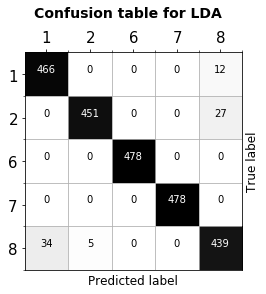

In [420]:
lda1 = LDA_TE(n_components, train_data1, train_labels1, test_data1, test_labels1)
confusion_table1(test_labels1, lda1, 'Confusion table for LDA')

accuracy: 0.901


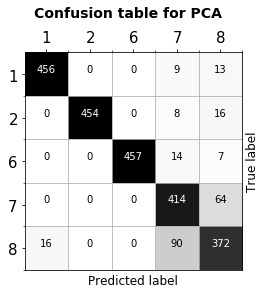

In [421]:
pca1 = PCA_TE(n_components, train_data1, train_labels1, test_data1, test_labels1)
confusion_table1(test_labels1, pca1, 'Confusion table for PCA')

In [258]:
ann1 = ANN_TE(n_samples, n_hidden, target1, train_data1, train_labels1, test_data1, test_labels1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2018-08-07 10:06:20.963850	epoch = 0	train accuracy: 0.920	test accuracy: 0.967
2018-08-07 10:06:22.446248	epoch = 1	train accuracy: 0.979	test accuracy: 0.967
2018-08-07 10:06:23.899608	epoch = 2	train accuracy: 0.972	test accuracy: 0.961
2018-08-07 10:06:25.336827	epoch = 3	train accuracy: 0.977	test accuracy: 0.970
2018-08-07 10:06:26.734934	epoch = 4	train accuracy: 0.980	test accuracy: 0.978
2018-08-07 10:06:28.158087	epoch = 5	train accuracy: 0.981	test accuracy: 0.972
2018-08-07 10:06:29.661896	epoch = 6	train accuracy: 0.979	test accuracy: 0.979
2018-08-07 10:06:31.038025	epoch = 7	train accuracy: 0.978	test accuracy: 0.955
2018-08-07 10:06:32.442183	epoch = 8	train accuracy: 0.979	test accuracy: 0.967
2018-08-07 10:06:33.903098	epoch = 9	train accuracy: 0.981	test accuracy: 0.967
2018-08-07 10:06:35.304671	epoch = 10	train accuracy: 0.979	test accuracy: 0.977
2018-08-07 10:06:36.760973	epoch = 11	train accuracy: 0.981	test accuracy: 0.965
2018-08-07 10:06:38.204971	epoch = 12	

In [259]:
lstm1 = LSTM_TE(n_samples, n_hidden, target1, train_data1, train_labels1, test_data1, test_labels1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2018-08-07 10:07:47.246876	epoch = 0	train accuracy: 0.935	test accuracy: 0.966
2018-08-07 10:07:49.217478	epoch = 1	train accuracy: 0.987	test accuracy: 0.959
2018-08-07 10:07:51.129987	epoch = 2	train accuracy: 0.986	test accuracy: 0.966
2018-08-07 10:07:52.799864	epoch = 3	train accuracy: 0.986	test accuracy: 0.980
2018-08-07 10:07:54.540034	epoch = 4	train accuracy: 0.988	test accuracy: 0.967
2018-08-07 10:07:56.226982	epoch = 5	train accuracy: 0.987	test accuracy: 0.970
2018-08-07 10:07:57.942565	epoch = 6	train accuracy: 0.989	test accuracy: 0.967
2018-08-07 10:07:59.643548	epoch = 7	train accuracy: 0.989	test accuracy: 0.962
2018-08-07 10:08:01.255862	epoch = 8	train accuracy: 0.990	test accuracy: 0.962
2018-08-07 10:08:03.020940	epoch = 9	train accuracy: 0.989	test accuracy: 0.967
2018-08-07 10:08:04.665539	epoch = 10	train accuracy: 0.990	test accuracy: 0.968
2018-08-07 10:08:06.338781	epoch = 11	train accuracy: 0.985	test accuracy: 0.967
2018-08-07 10:08:07.933368	epoch = 12	

In [307]:
lstmb1 = LSTMB_TE(n_samples, n_hidden, target1, train_data1, train_labels1, test_data1, test_labels1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2018-08-07 11:20:52.402138	epoch = 0	train accuracy: 0.945	test accuracy: 0.966
2018-08-07 11:20:53.603236	epoch = 1	train accuracy: 0.984	test accuracy: 0.969
2018-08-07 11:20:54.825831	epoch = 2	train accuracy: 0.987	test accuracy: 0.981
2018-08-07 11:20:56.032707	epoch = 3	train accuracy: 0.987	test accuracy: 0.971
2018-08-07 11:20:57.258018	epoch = 4	train accuracy: 0.985	test accuracy: 0.973
2018-08-07 11:20:58.517412	epoch = 5	train accuracy: 0.988	test accuracy: 0.972
2018-08-07 11:20:59.730288	epoch = 6	train accuracy: 0.990	test accuracy: 0.969
2018-08-07 11:21:00.936664	epoch = 7	train accuracy: 0.986	test accuracy: 0.963
2018-08-07 11:21:02.202137	epoch = 8	train accuracy: 0.987	test accuracy: 0.974
2018-08-07 11:21:03.431644	epoch = 9	train accuracy: 0.989	test accuracy: 0.968
2018-08-07 11:21:04.665077	epoch = 10	train accuracy: 0.994	test accuracy: 0.971
2018-08-07 11:21:05.934372	epoch = 11	train accuracy: 0.987	test accuracy: 0.978
2018-08-07 11:21:07.183213	epoch = 12	

In [372]:
cnn1 = CNN_TE(n_samples, n_hidden, target1, train_data1, train_labels1, test_data1, test_labels1)

(3990, 1, 156)
(2390, 1, 156)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2018-08-08 04:52:41.976418	epoch = 0	train accuracy: 0.898	test accuracy: 0.963
2018-08-08 04:52:43.491858	epoch = 1	train accuracy: 0.961	test accuracy: 0.944
2018-08-08 04:52:45.039506	epoch = 2	train accuracy: 0.967	test accuracy: 0.940
2018-08-08 04:52:46.565452	epoch = 3	train accuracy: 0.967	test accuracy: 0.953
2018-08-08 04:52:48.052764	epoch = 4	train accuracy: 0.976	test accuracy: 0.964
2018-08-08 04:52:49.591812	epoch = 5	train accuracy: 0.971	test accuracy: 0.965
2018-08-08 04:52:51.134302	epoch = 6	train accuracy: 0.974	test accuracy: 0.961
2018-08-08 04:52:52.655644	epoch = 7	train accuracy: 0.972	test accuracy: 0.959
2018-08-08 04:52:54.189963	epoch = 8	train accuracy: 0.971	test accuracy: 0.951
2018-08-08 04:52:55.661272	epoch = 9	train accuracy: 0.972	test accuracy: 0.968
2018-08-08 04:52:57.186157	epoch = 10	train accuracy: 0.970	test accuracy: 0.969
2018-08-08 04:52:58.714969	epoch = 11	train accuracy: 0.978	test accuracy: 0.951
2018-08-08 04:53:00.234473	epoch = 12	

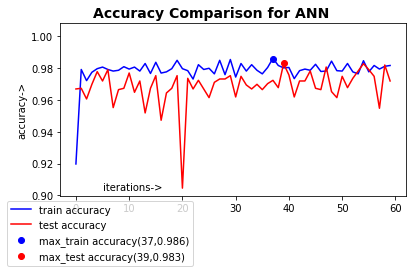

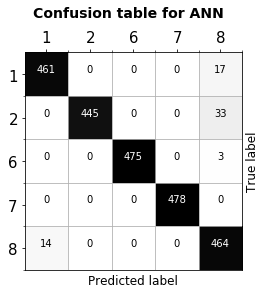

In [422]:
train_acc1, test_acc1, targets1, pred1 = ann1
plots((train_acc1, 'train accuracy'), 'accuracy', 'Accuracy Comparison for ANN',  num_iterations=60, x_label='iterations',second=(test_acc1, 'test accuracy'), third=None, show_min=True)
confusion_table1(targets1, pred1, 'Confusion table for ANN')

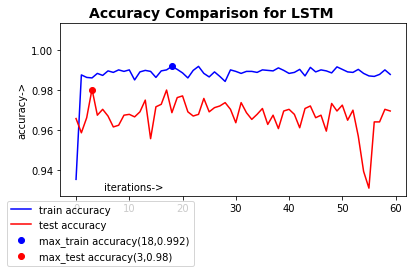

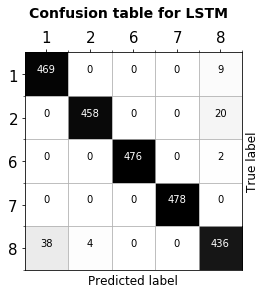

In [423]:
train_acc1, test_acc1, targets1, pred1 = lstm1
plots((train_acc1, 'train accuracy'), 'accuracy', 'Accuracy Comparison for LSTM',  num_iterations=60, x_label='iterations',second=(test_acc1, 'test accuracy'), third=None, show_min=True)
confusion_table1(targets1, pred1, 'Confusion table for LSTM')

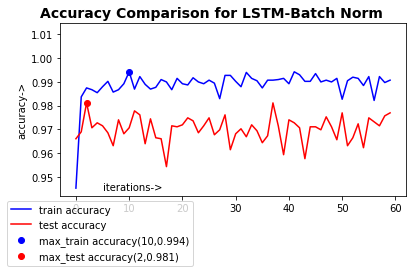

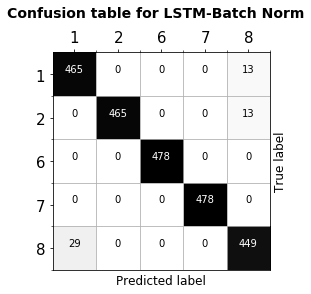

In [424]:
train_acc1, test_acc1, targets1, pred1 = lstmb1
plots((train_acc1, 'train accuracy'), 'accuracy', 'Accuracy Comparison for LSTM-Batch Norm',  num_iterations=60, x_label='iterations',second=(test_acc1, 'test accuracy'), third=None, show_min=True)
confusion_table1(targets1, pred1, 'Confusion table for LSTM-Batch Norm')

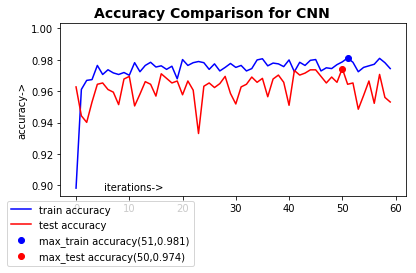

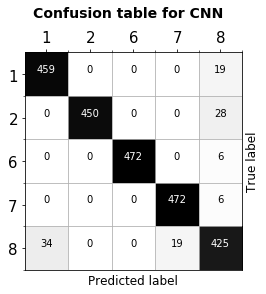

In [425]:
train_acc1, test_acc1, targets1, pred1 = cnn1
plots((train_acc1, 'train accuracy'), 'accuracy', 'Accuracy Comparison for CNN',  num_iterations=60, x_label='iterations',second=(test_acc1, 'test accuracy'), third=None, show_min=True)
confusion_table1(targets1, pred1, 'Confusion table for CNN')

# Fault Set 2 : Using different set of faults to test the model

In [426]:
target2 = [3, 4, 5, 9, 10, 11, 12]

train_data2, train_labels2 = gen_seq_data(target2, n_samples, is_train=True)
test_data2, test_labels2 = gen_seq_data(target2, n_samples, is_train=False)

scaler2 = preprocessing.StandardScaler().fit(train_data2)
train_data2 = scaler.transform(train_data2)
test_data2 = scaler.transform(test_data2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


accuracy: 0.655


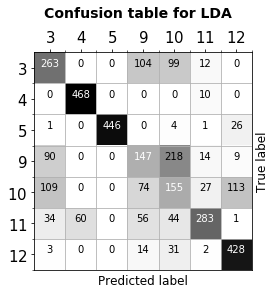

In [427]:
lda2 = LDA_TE(n_components, train_data2, train_labels2, test_data2, test_labels2)
confusion_table2(test_labels2, lda2, 'Confusion table for LDA')

accuracy: 0.395


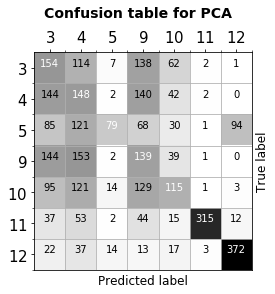

In [428]:
pca2 = PCA_TE(n_components, train_data2, train_labels2, test_data2, test_labels2)
confusion_table2(test_labels2, pca2, 'Confusion table for PCA')

In [268]:
ann2 = ANN_TE(n_samples, n_hidden, target2, train_data2, train_labels2, test_data2, test_labels2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2018-08-07 10:12:25.321194	epoch = 0	train accuracy: 0.375	test accuracy: 0.455
2018-08-07 10:12:27.245725	epoch = 1	train accuracy: 0.536	test accuracy: 0.626
2018-08-07 10:12:29.161872	epoch = 2	train accuracy: 0.655	test accuracy: 0.656
2018-08-07 10:12:31.040934	epoch = 3	train accuracy: 0.671	test accuracy: 0.671
2018-08-07 10:12:32.933916	epoch = 4	train accuracy: 0.698	test accuracy: 0.714
2018-08-07 10:12:34.888103	epoch = 5	train accuracy: 0.699	test accuracy: 0.704
2018-08-07 10:12:36.869782	epoch = 6	train accuracy: 0.716	test accuracy: 0.764
2018-08-07 10:12:38.818702	epoch = 7	train accuracy: 0.730	test accuracy: 0.759
2018-08-07 10:12:40.862660	epoch = 8	train accuracy: 0.740	test accuracy: 0.733
2018-08-07 10:12:42.790793	epoch = 9	train accuracy: 0.733	test accuracy: 0.754
2018-08-07 10:12:44.839343	epoch = 10	train accuracy: 0.742	test accuracy: 0.750
2018-08-07 10:12:46.862912	epoch = 11	train accuracy: 0.741	test accuracy: 0.759
2018-08-07 10:12:48.813374	epoch = 12	

In [269]:
lstm2 = LSTM_TE(n_samples, n_hidden, target2, train_data2, train_labels2, test_data2, test_labels2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2018-08-07 10:14:25.158889	epoch = 0	train accuracy: 0.370	test accuracy: 0.421
2018-08-07 10:14:27.549826	epoch = 1	train accuracy: 0.468	test accuracy: 0.473
2018-08-07 10:14:30.055192	epoch = 2	train accuracy: 0.530	test accuracy: 0.567
2018-08-07 10:14:32.430539	epoch = 3	train accuracy: 0.615	test accuracy: 0.624
2018-08-07 10:14:34.817324	epoch = 4	train accuracy: 0.651	test accuracy: 0.657
2018-08-07 10:14:37.255063	epoch = 5	train accuracy: 0.711	test accuracy: 0.666
2018-08-07 10:14:39.588151	epoch = 6	train accuracy: 0.734	test accuracy: 0.685
2018-08-07 10:14:41.901962	epoch = 7	train accuracy: 0.722	test accuracy: 0.708
2018-08-07 10:14:44.364102	epoch = 8	train accuracy: 0.738	test accuracy: 0.684
2018-08-07 10:14:46.916612	epoch = 9	train accuracy: 0.748	test accuracy: 0.709
2018-08-07 10:14:49.452359	epoch = 10	train accuracy: 0.749	test accuracy: 0.724
2018-08-07 10:14:51.782928	epoch = 11	train accuracy: 0.743	test accuracy: 0.698
2018-08-07 10:14:54.190834	epoch = 12	

In [310]:
lstmb2 = LSTMB_TE(n_samples, n_hidden, target2, train_data2, train_labels2, test_data2, test_labels2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2018-08-07 11:26:20.116628	epoch = 0	train accuracy: 0.493	test accuracy: 0.417
2018-08-07 11:26:21.895881	epoch = 1	train accuracy: 0.673	test accuracy: 0.613
2018-08-07 11:26:23.684305	epoch = 2	train accuracy: 0.712	test accuracy: 0.648
2018-08-07 11:26:25.431034	epoch = 3	train accuracy: 0.728	test accuracy: 0.698
2018-08-07 11:26:27.186532	epoch = 4	train accuracy: 0.734	test accuracy: 0.698
2018-08-07 11:26:28.949699	epoch = 5	train accuracy: 0.750	test accuracy: 0.684
2018-08-07 11:26:30.723295	epoch = 6	train accuracy: 0.756	test accuracy: 0.678
2018-08-07 11:26:32.515880	epoch = 7	train accuracy: 0.747	test accuracy: 0.690
2018-08-07 11:26:34.255624	epoch = 8	train accuracy: 0.759	test accuracy: 0.723
2018-08-07 11:26:35.979176	epoch = 9	train accuracy: 0.758	test accuracy: 0.713
2018-08-07 11:26:37.733833	epoch = 10	train accuracy: 0.755	test accuracy: 0.735
2018-08-07 11:26:39.446614	epoch = 11	train accuracy: 0.764	test accuracy: 0.729
2018-08-07 11:26:41.193507	epoch = 12	

In [375]:
cnn2 = CNN_TE(n_samples, n_hidden, target2, train_data2, train_labels2, test_data2, test_labels2)

(5586, 1, 156)
(3346, 1, 156)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2018-08-08 04:56:25.938956	epoch = 0	train accuracy: 0.358	test accuracy: 0.368
2018-08-08 04:56:28.016714	epoch = 1	train accuracy: 0.390	test accuracy: 0.371
2018-08-08 04:56:30.113451	epoch = 2	train accuracy: 0.398	test accuracy: 0.384
2018-08-08 04:56:32.172080	epoch = 3	train accuracy: 0.408	test accuracy: 0.431
2018-08-08 04:56:34.233161	epoch = 4	train accuracy: 0.401	test accuracy: 0.364
2018-08-08 04:56:36.301487	epoch = 5	train accuracy: 0.409	test accuracy: 0.419
2018-08-08 04:56:38.339264	epoch = 6	train accuracy: 0.424	test accuracy: 0.439
2018-08-08 04:56:40.391434	epoch = 7	train accuracy: 0.435	test accuracy: 0.393
2018-08-08 04:56:42.435736	epoch = 8	train accuracy: 0.437	test accuracy: 0.448
2018-08-08 04:56:44.550969	epoch = 9	train accuracy: 0.459	test accuracy: 0.473
2018-08-08 04:56:46.792128	epoch = 10	train accuracy: 0.471	test accuracy: 0.483
2018-08-08 04:56:48.888627	epoch = 11	train accuracy: 0.483	test accuracy: 0.512
2018-08-08 04:56:50.950919	epoch = 12	

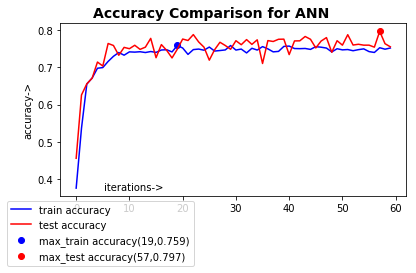

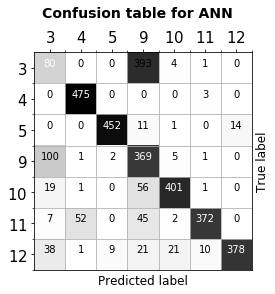

In [429]:
train_acc2, test_acc2, targets2, pred2 = ann2
plots((train_acc2, 'train accuracy'), 'accuracy', 'Accuracy Comparison for ANN',  num_iterations=60, x_label='iterations',second=(test_acc2, 'test accuracy'), third=None, show_min=True)
confusion_table2(targets2, pred2, 'Confusion table for ANN')

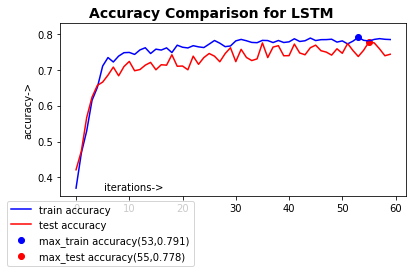

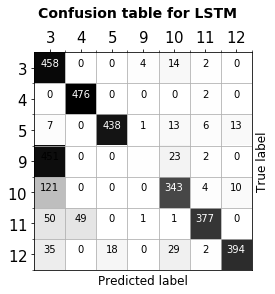

In [430]:
train_acc2, test_acc2, targets2, pred2 = lstm2
plots((train_acc2, 'train accuracy'), 'accuracy', 'Accuracy Comparison for LSTM',  num_iterations=60, x_label='iterations',second=(test_acc2, 'test accuracy'), third=None, show_min=True)
confusion_table2(targets2, pred2, 'Confusion table for LSTM')

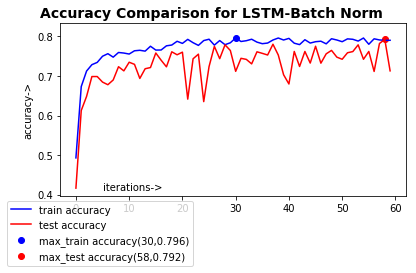

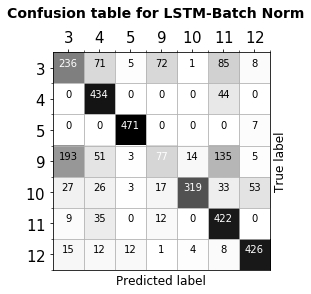

In [431]:
train_acc2, test_acc2, targets2, pred2 = lstmb2
plots((train_acc2, 'train accuracy'), 'accuracy', 'Accuracy Comparison for LSTM-Batch Norm',  num_iterations=60, x_label='iterations',second=(test_acc2, 'test accuracy'), third=None, show_min=True)
confusion_table2(targets2, pred2, 'Confusion table for LSTM-Batch Norm')

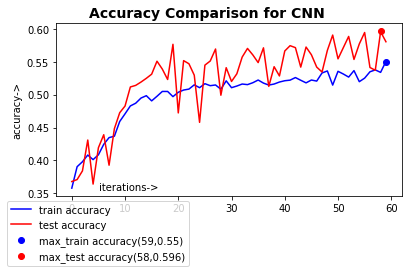

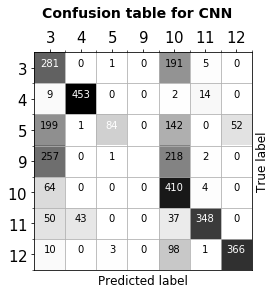

In [432]:
train_acc2, test_acc2, targets2, pred2 = cnn2
plots((train_acc2, 'train accuracy'), 'accuracy', 'Accuracy Comparison for CNN',  num_iterations=60, x_label='iterations',second=(test_acc2, 'test accuracy'), third=None, show_min=True)
confusion_table2(targets2, pred2, 'Confusion table for CNN')

# Target 3 : Using ALL of faults to test the model

In [433]:
target3 = list(range(1, 22)) 

train_data3, train_labels3 = gen_seq_data(target3, n_samples, is_train=True)
test_data3, test_labels3 = gen_seq_data(target3, n_samples, is_train=False)

scaler3 = preprocessing.StandardScaler().fit(train_data3)
train_data3 = scaler.transform(train_data3)
test_data3 = scaler.transform(test_data3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


accuracy: 0.601


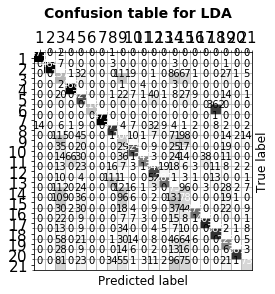

In [434]:
lda3 = LDA_TE(n_components, train_data3, train_labels3, test_data3, test_labels3)
confusion_table3(test_labels3, lda3, 'Confusion table for LDA')

accuracy: 0.460


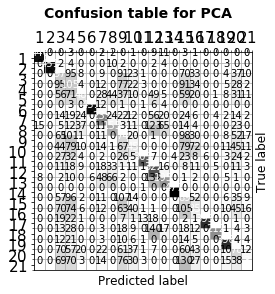

In [435]:
pca3 = PCA_TE(n_components, train_data3, train_labels3, test_data3, test_labels3)
confusion_table3(test_labels3, pca3, 'Confusion table for PCA')

In [276]:
ann3 = ANN_TE(n_samples, n_hidden, target3, train_data3, train_labels3, test_data3, test_labels3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2018-08-07 10:28:43.176105	epoch = 0	train accuracy: 0.453	test accuracy: 0.477
2018-08-07 10:28:49.391184	epoch = 1	train accuracy: 0.541	test accuracy: 0.523
2018-08-07 10:28:55.373829	epoch = 2	train accuracy: 0.564	test accuracy: 0.522
2018-08-07 10:29:01.374172	epoch = 3	train accuracy: 0.583	test accuracy: 0.554
2018-08-07 10:29:07.332517	epoch = 4	train accuracy: 0.594	test accuracy: 0.555
2018-08-07 10:29:13.317431	epoch = 5	train accuracy: 0.608	test accuracy: 0.560
2018-08-07 10:29:19.273753	epoch = 6	train accuracy: 0.606	test accuracy: 0.577
2018-08-07 10:29:25.196238	epoch = 7	train accuracy: 0.611	test accuracy: 0.544
2018-08-07 10:29:31.239330	epoch = 8	train accuracy: 0.617	test accuracy: 0.548
2018-08-07 10:29:37.381386	epoch = 9	train accuracy: 0.614	test accuracy: 0.543
2018-08-07 10:29:43.463033	epoch = 10	train accuracy: 0.623	test accuracy: 0.575
2018-08-07 10:29:49.580539	epoch = 11	train accuracy: 0.624	test accuracy: 0.601
2018-08-07 10:29:55.503115	epoch = 12	

In [277]:
lstm3 = LSTM_TE(n_samples, n_hidden, target3, train_data3, train_labels3, test_data3, test_labels3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2018-08-07 10:34:47.069094	epoch = 0	train accuracy: 0.521	test accuracy: 0.520
2018-08-07 10:34:54.174795	epoch = 1	train accuracy: 0.611	test accuracy: 0.569
2018-08-07 10:35:01.113596	epoch = 2	train accuracy: 0.641	test accuracy: 0.584
2018-08-07 10:35:08.003633	epoch = 3	train accuracy: 0.660	test accuracy: 0.593
2018-08-07 10:35:14.886518	epoch = 4	train accuracy: 0.660	test accuracy: 0.551
2018-08-07 10:35:22.091967	epoch = 5	train accuracy: 0.661	test accuracy: 0.600
2018-08-07 10:35:29.211804	epoch = 6	train accuracy: 0.665	test accuracy: 0.563
2018-08-07 10:35:36.624118	epoch = 7	train accuracy: 0.668	test accuracy: 0.580
2018-08-07 10:35:43.718191	epoch = 8	train accuracy: 0.666	test accuracy: 0.569
2018-08-07 10:35:50.961340	epoch = 9	train accuracy: 0.667	test accuracy: 0.596
2018-08-07 10:35:57.835202	epoch = 10	train accuracy: 0.667	test accuracy: 0.580
2018-08-07 10:36:04.827072	epoch = 11	train accuracy: 0.668	test accuracy: 0.603
2018-08-07 10:36:12.168813	epoch = 12	

In [312]:
lstmb3 = LSTMB_TE(n_samples, n_hidden, target3, train_data3, train_labels3, test_data3, test_labels3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2018-08-07 11:28:09.024976	epoch = 0	train accuracy: 0.557	test accuracy: 0.535
2018-08-07 11:28:14.231748	epoch = 1	train accuracy: 0.665	test accuracy: 0.613
2018-08-07 11:28:19.370596	epoch = 2	train accuracy: 0.700	test accuracy: 0.622
2018-08-07 11:28:24.708816	epoch = 3	train accuracy: 0.712	test accuracy: 0.634
2018-08-07 11:28:29.898359	epoch = 4	train accuracy: 0.716	test accuracy: 0.629
2018-08-07 11:28:35.166254	epoch = 5	train accuracy: 0.713	test accuracy: 0.653
2018-08-07 11:28:40.709375	epoch = 6	train accuracy: 0.717	test accuracy: 0.639
2018-08-07 11:28:46.045667	epoch = 7	train accuracy: 0.716	test accuracy: 0.632
2018-08-07 11:28:51.247712	epoch = 8	train accuracy: 0.718	test accuracy: 0.664
2018-08-07 11:28:56.462470	epoch = 9	train accuracy: 0.718	test accuracy: 0.644
2018-08-07 11:29:01.657859	epoch = 10	train accuracy: 0.720	test accuracy: 0.644
2018-08-07 11:29:06.817355	epoch = 11	train accuracy: 0.720	test accuracy: 0.640
2018-08-07 11:29:11.965472	epoch = 12	

In [379]:
cnn3 = CNN_TE(n_samples, n_hidden, target3, train_data3, train_labels3, test_data3, test_labels3)

(16758, 1, 156)
(10038, 1, 156)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2018-08-08 04:58:37.638503	epoch = 0	train accuracy: 0.458	test accuracy: 0.429
2018-08-08 04:58:43.947895	epoch = 1	train accuracy: 0.517	test accuracy: 0.459
2018-08-08 04:58:50.376866	epoch = 2	train accuracy: 0.526	test accuracy: 0.478
2018-08-08 04:58:56.667375	epoch = 3	train accuracy: 0.528	test accuracy: 0.466
2018-08-08 04:59:02.993390	epoch = 4	train accuracy: 0.529	test accuracy: 0.473
2018-08-08 04:59:09.292878	epoch = 5	train accuracy: 0.530	test accuracy: 0.469
2018-08-08 04:59:15.635156	epoch = 6	train accuracy: 0.537	test accuracy: 0.460
2018-08-08 04:59:21.904905	epoch = 7	train accuracy: 0.539	test accuracy: 0.483
2018-08-08 04:59:28.265503	epoch = 8	train accuracy: 0.531	test accuracy: 0.499
2018-08-08 04:59:34.670671	epoch = 9	train accuracy: 0.533	test accuracy: 0.468
2018-08-08 04:59:40.931399	epoch = 10	train accuracy: 0.530	test accuracy: 0.482
2018-08-08 04:59:47.232400	epoch = 11	train accuracy: 0.537	test accuracy: 0.485
2018-08-08 04:59:53.527090	epoch = 12	

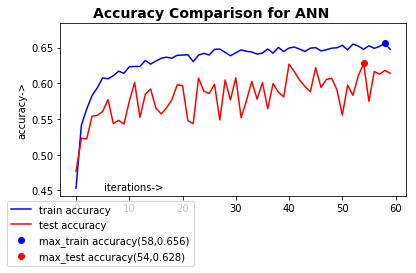

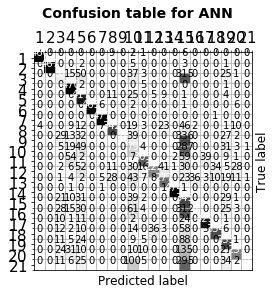

In [436]:
train_acc3, test_acc3, targets3, pred3 = ann3
plots((train_acc3, 'train accuracy'), 'accuracy', 'Accuracy Comparison for ANN',  num_iterations=60, x_label='iterations',second=(test_acc3, 'test accuracy'), third=None, show_min=True)
confusion_table3(targets3, pred3, 'Confusion table for ANN')

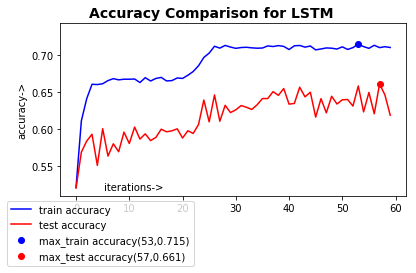

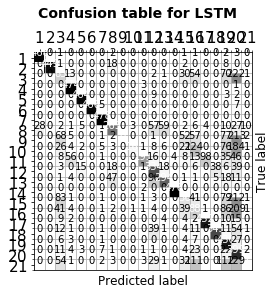

In [437]:
train_acc3, test_acc3, targets3, pred3 = lstm3
plots((train_acc3, 'train accuracy'), 'accuracy', 'Accuracy Comparison for LSTM',  num_iterations=60, x_label='iterations',second=(test_acc3, 'test accuracy'), third=None, show_min=True)
confusion_table3(targets3, pred3, 'Confusion table for LSTM')

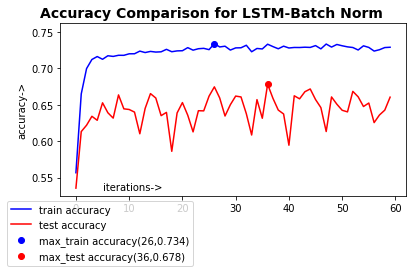

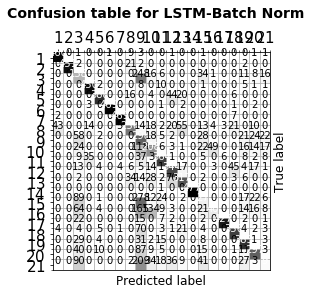

In [438]:
train_acc3, test_acc3, targets3, pred3 = lstmb3
plots((train_acc3, 'train accuracy'), 'accuracy', 'Accuracy Comparison for LSTM-Batch Norm',  num_iterations=60, x_label='iterations',second=(test_acc3, 'test accuracy'), third=None, show_min=True)
confusion_table3(targets3, pred3, 'Confusion table for LSTM-Batch Norm')

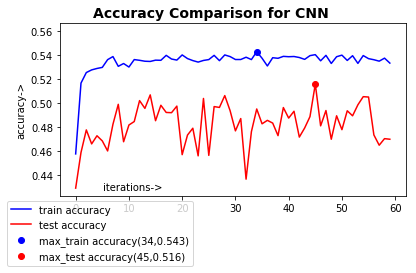

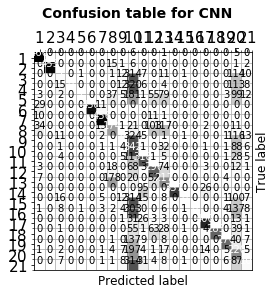

In [439]:
train_acc3, test_acc3, targets3, pred3 = cnn3
plots((train_acc3, 'train accuracy'), 'accuracy', 'Accuracy Comparison for CNN',  num_iterations=60, x_label='iterations',second=(test_acc3, 'test accuracy'), third=None, show_min=True)
confusion_table3(targets3, pred3, 'Confusion table for CNN')

# Comparison of Accuracies between ANN, LSTM and LSTM-BN

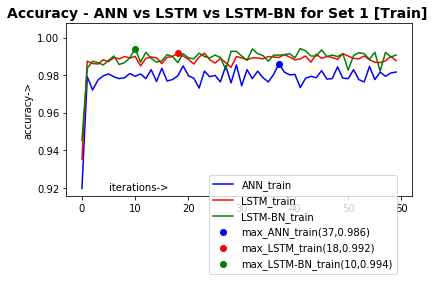

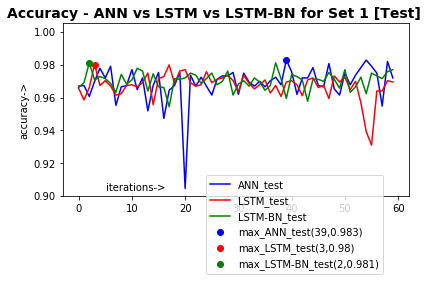

(0, 0, 0)

In [383]:
train_acc1a, test_acc1a, targets1a, pred1a = ann1
train_acc1, test_acc1, targets1, pred1 = lstm1
train_acc1b, test_acc1b, targets1b, pred1b = lstmb1
plots((train_acc1a, 'ANN_train'), 'accuracy', 'Accuracy - ANN vs LSTM vs LSTM-BN for Set 1 [Train]',  num_iterations=60, x_label='iterations',second=(train_acc1, 'LSTM_train'), third=(train_acc1b, 'LSTM-BN_train'), show_min=True)
plots((test_acc1a, 'ANN_test'), 'accuracy', 'Accuracy - ANN vs LSTM vs LSTM-BN for Set 1 [Test]',  num_iterations=60, x_label='iterations',second=(test_acc1, 'LSTM_test'), third=(test_acc1b, 'LSTM-BN_test'), show_min=True)

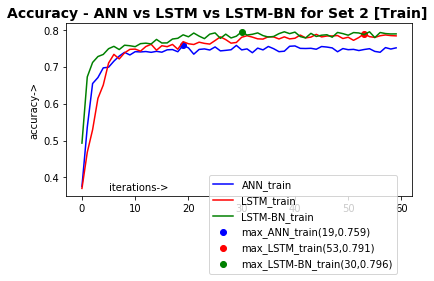

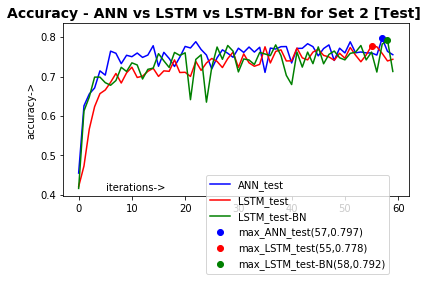

(0, 0, 0)

In [384]:
train_acc2a, test_acc2a, targets2a, pred2a = ann2
train_acc2, test_acc2, targets2, pred2 = lstm2
train_acc2b, test_acc2b, targets2b, pred2b = lstmb2
plots((train_acc2a, 'ANN_train'), 'accuracy', 'Accuracy - ANN vs LSTM vs LSTM-BN for Set 2 [Train]',  num_iterations=60, x_label='iterations',second=(train_acc2, 'LSTM_train'), third=(train_acc2b, 'LSTM-BN_train'), show_min=True)
plots((test_acc2a, 'ANN_test'), 'accuracy', 'Accuracy - ANN vs LSTM vs LSTM-BN for Set 2 [Test]',  num_iterations=60, x_label='iterations',second=(test_acc2, 'LSTM_test'), third=(test_acc2b, 'LSTM_test-BN'), show_min=True)

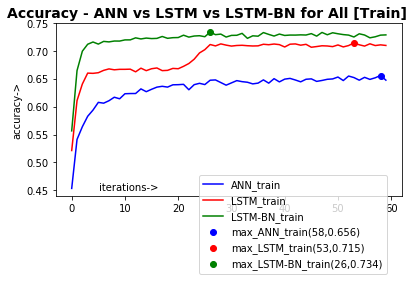

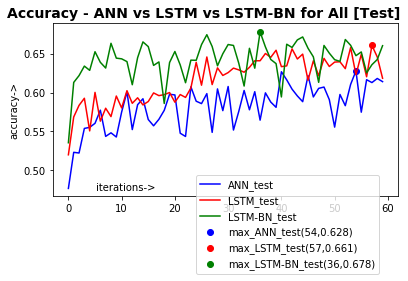

(0, 0, 0)

In [385]:
train_acc3a, test_acc3a, targets3a, pred3a = ann3
train_acc3, test_acc3, targets3, pred3 = lstm3
train_acc3b, test_acc3b, targets3b, pred3b = lstmb3
plots((train_acc3a, 'ANN_train'), 'accuracy', 'Accuracy - ANN vs LSTM vs LSTM-BN for All [Train]',  num_iterations=60, x_label='iterations',second=(train_acc3, 'LSTM_train'), third=(train_acc3b, 'LSTM-BN_train'), show_min=True)
plots((test_acc3a, 'ANN_test'), 'accuracy', 'Accuracy - ANN vs LSTM vs LSTM-BN for All [Test]',  num_iterations=60, x_label='iterations',second=(test_acc3, 'LSTM_test'), third=(test_acc3b, 'LSTM-BN_test'), show_min=True)

# Comparison of Accuracies between ANN, CNN and LSTM-BN

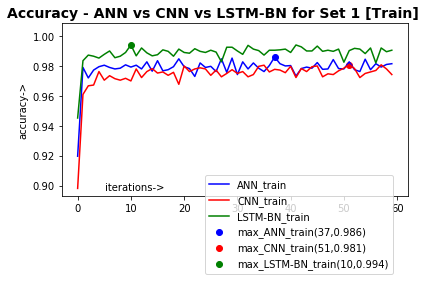

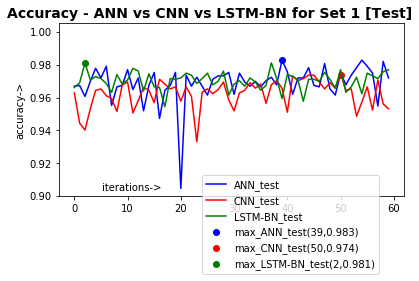

(0, 0, 0)

In [386]:
train_acc1a, test_acc1a, targets1a, pred1a = ann1
train_acc1, test_acc1, targets1, pred1 = cnn1
train_acc1b, test_acc1b, targets1b, pred1b = lstmb1
plots((train_acc1a, 'ANN_train'), 'accuracy', 'Accuracy - ANN vs CNN vs LSTM-BN for Set 1 [Train]',  num_iterations=60, x_label='iterations',second=(train_acc1, 'CNN_train'), third=(train_acc1b, 'LSTM-BN_train'), show_min=True)
plots((test_acc1a, 'ANN_test'), 'accuracy', 'Accuracy - ANN vs CNN vs LSTM-BN for Set 1 [Test]',  num_iterations=60, x_label='iterations',second=(test_acc1, 'CNN_test'), third=(test_acc1b, 'LSTM-BN_test'), show_min=True)

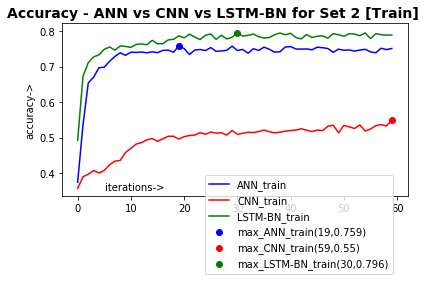

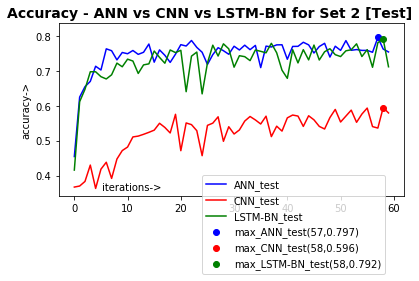

(0, 0, 0)

In [387]:
train_acc2a, test_acc2a, targets2a, pred2a = ann2
train_acc2, test_acc2, targets2, pred2 = cnn2
train_acc2b, test_acc2b, targets2b, pred2b = lstmb2
plots((train_acc2a, 'ANN_train'), 'accuracy', 'Accuracy - ANN vs CNN vs LSTM-BN for Set 2 [Train]',  num_iterations=60, x_label='iterations',second=(train_acc2, 'CNN_train'), third=(train_acc2b, 'LSTM-BN_train'), show_min=True)
plots((test_acc2a, 'ANN_test'), 'accuracy', 'Accuracy - ANN vs CNN vs LSTM-BN for Set 2 [Test]',  num_iterations=60, x_label='iterations',second=(test_acc2, 'CNN_test'), third=(test_acc2b, 'LSTM-BN_test'), show_min=True)

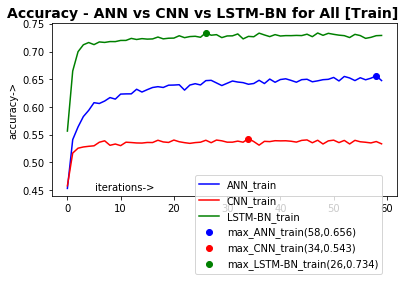

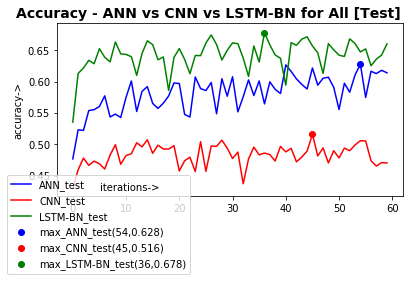

(0, 0, 0)

In [388]:
train_acc3a, test_acc3a, targets3a, pred3a = ann3
train_acc3, test_acc3, targets3, pred3 = cnn3
train_acc3b, test_acc3b, targets3b, pred3b = lstmb3
plots((train_acc3a, 'ANN_train'), 'accuracy', 'Accuracy - ANN vs CNN vs LSTM-BN for All [Train]',  num_iterations=60, x_label='iterations',second=(train_acc3, 'CNN_train'), third=(train_acc3b, 'LSTM-BN_train'), show_min=True)
plots((test_acc3a, 'ANN_test'), 'accuracy', 'Accuracy - ANN vs CNN vs LSTM-BN for All [Test]',  num_iterations=60, x_label='iterations',second=(test_acc3, 'CNN_test'), third=(test_acc3b, 'LSTM-BN_test'), show_min=True)

# Comparison of Accuracies across Fault Sets

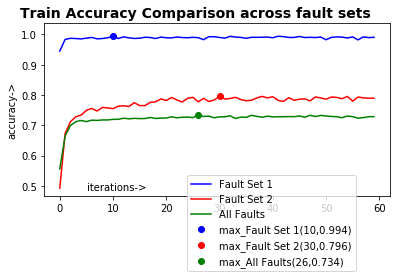

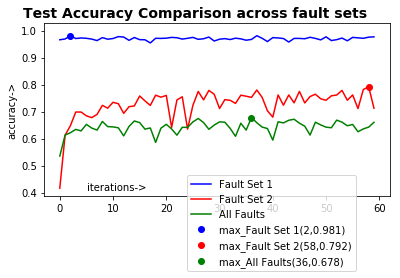

(0, 0, 0)

In [442]:
train_acc1, test_acc1,_,_  = lstmb1
train_acc2, test_acc2,_,_ = lstmb2
train_acc3, test_acc3,_,_ = lstmb3
plots((train_acc1, 'Fault Set 1'), 'accuracy', 'Train Accuracy Comparison across fault sets',  num_iterations=60, x_label='iterations',second=(train_acc2, 'Fault Set 2'), third=(train_acc3, 'All Faults'), show_min=True)
plots((test_acc1, 'Fault Set 1'), 'accuracy', 'Test Accuracy Comparison across fault sets',  num_iterations=60, x_label='iterations',second=(test_acc2, 'Fault Set 2'), third=(test_acc3, 'All Faults'), show_min=True)